In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# df.dtypes

### Checking Duplicate values

In [8]:
# df.duplicated().sum()

In [9]:
# df.drop_duplicates(keep = "first")

### Checking for missing values

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Type of missingness
- MCAR - missing completely at random
- MAR - missing at random
- MNAR - Missing not a random

In [13]:
# check for the percentage of missing values
(df.isna().sum() / len(df)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [14]:
# df.isna().mean() * 100

#### MCAR
Rule of Thumb;
- when missing values in a column is less than 3% of the data, drop it
- when a column has more than 50% of missing values, you drop column
  
This is called ` Listwise Deletion & Complete Case Analysis`

- you can Impute using mean, median and mode, or filling with zeros or other values

### Observation

The result here shows some rows in **Age, Cabin and Embarked columns** have some missings values. Taking a closer look at cabin columns, it is observed that more than half of the rows are missing values

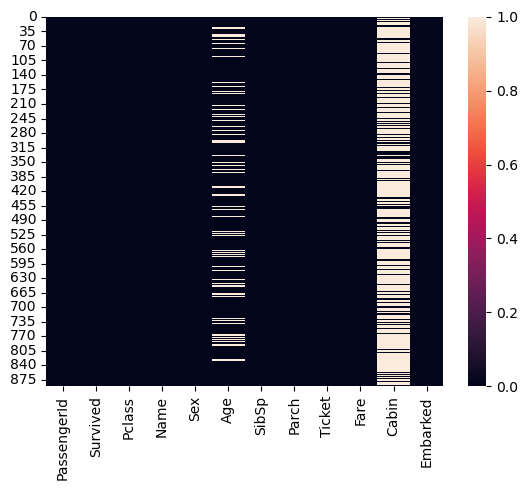

In [17]:
sns.heatmap(df.isna());

### Using MSNO library

# Missing Value Analysis

In [20]:
# msno.matrix(df);

In [21]:
missing = df[df['Cabin'].isnull()]

In [22]:
complete = df[df['Cabin'].notnull()]

In [23]:
# complete.describe()

In [24]:
sorted_df = df.sort_values(by = 'Fare', ascending = False )

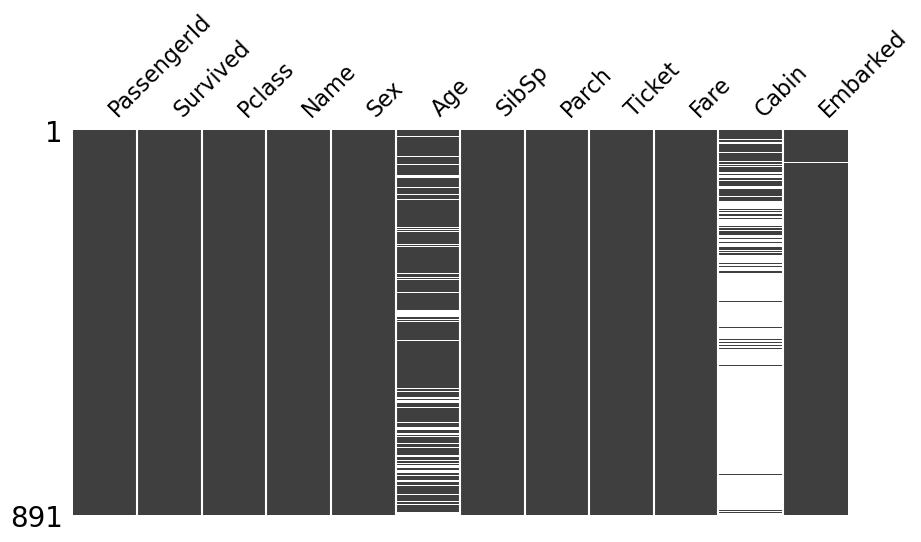

In [25]:
fig, ax = plt.subplots(figsize = (10, 5))
msno.matrix(sorted_df, ax =ax);

### Observation
-There is some sort of relationship between Fare and missing values in Cabin

Look out for ;
- Low or high cardinality
- Amount of variance

In [28]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [29]:
# VarianceThreshold-- sklearn object for feature selection based on variance

In [30]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [31]:
# df.describe()

In [32]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
df.index

RangeIndex(start=0, stop=891, step=1)

### Fixing inconsistencies in column names

In [35]:
# df.columns = df.columns.str.lower()

In [36]:
# df.columns = df.columns.str.strip()

In [37]:
# df.rename(columns = {'sex' : 'gender', 'name': 'fullname'}, inplace = True)

In [38]:
# df.columns.str.replace('sex' ,'gender')

### Summary Statistics for both numerical and categorical feature

In [40]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Observations
- youngest person on the ship is 4 months old and oldest is 80, and an AVG age of 28 years old
- There are people with 0-8 number of siblings and/or spouse, vast majority have none(0)
- min fare is 0 and max is 512, mean is 14

### Observation
- The mininum fare is zero, meaning there are possibly some passengers that did not pay, perharps this are the crew members. they are 15 in number in the dataset

In [43]:
df.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Exploratory Data Analysis

Assignment 
- What is statistics.
- how is statistics important to data analysis.
- what is population and sample.
- what is a variable and how many types of data do we have with regards to no. of variable
- ways we can describe data
- Measure of centre or central tendency & measure of dispersion (variance, std, IQR, percentile/Quantile),
histogram, box and whiskers and plot.
- skewness and normal distribution.
- correlation

## Univariate Analysis

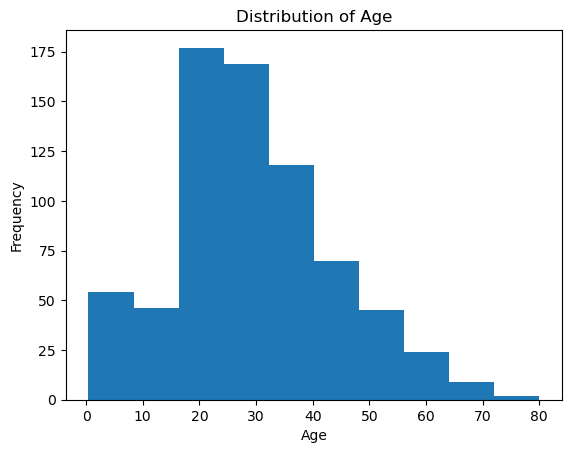

In [47]:
plt.hist(df['Age'], bins = 10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age');

## Checking the distribution of numerical features

In [49]:
num_col = df.select_dtypes('number').columns

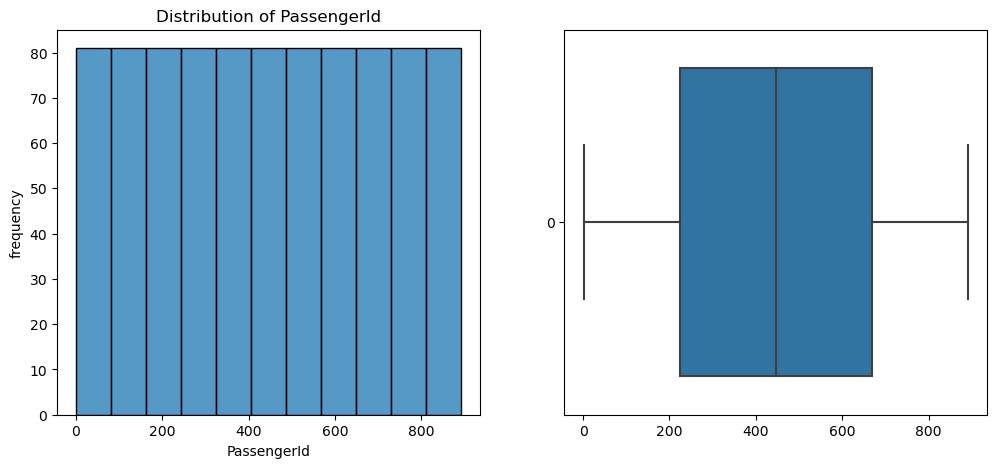

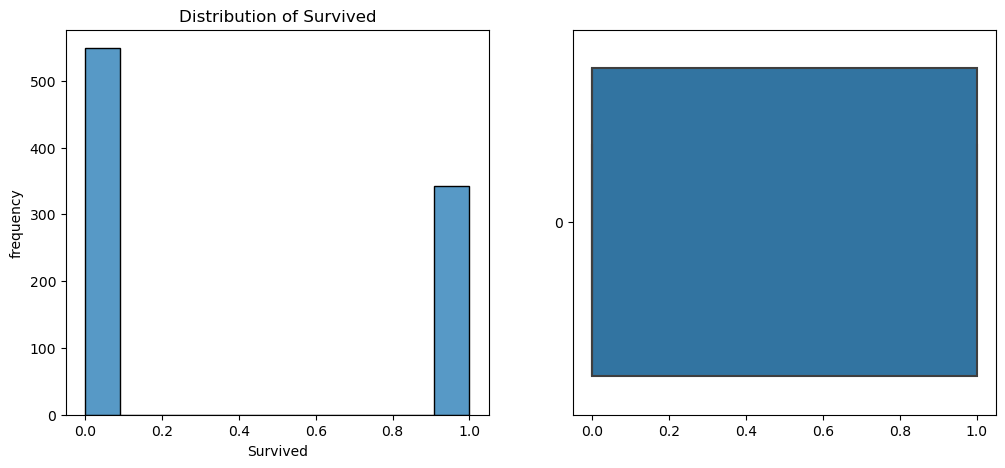

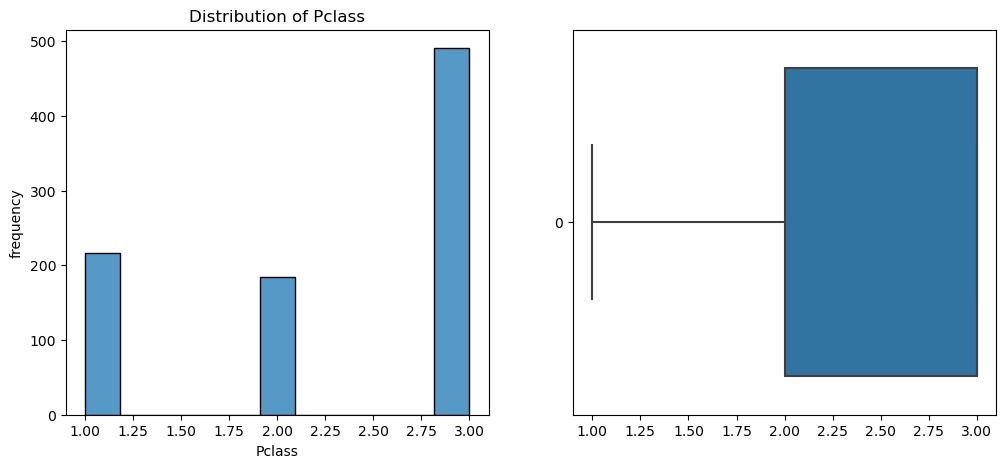

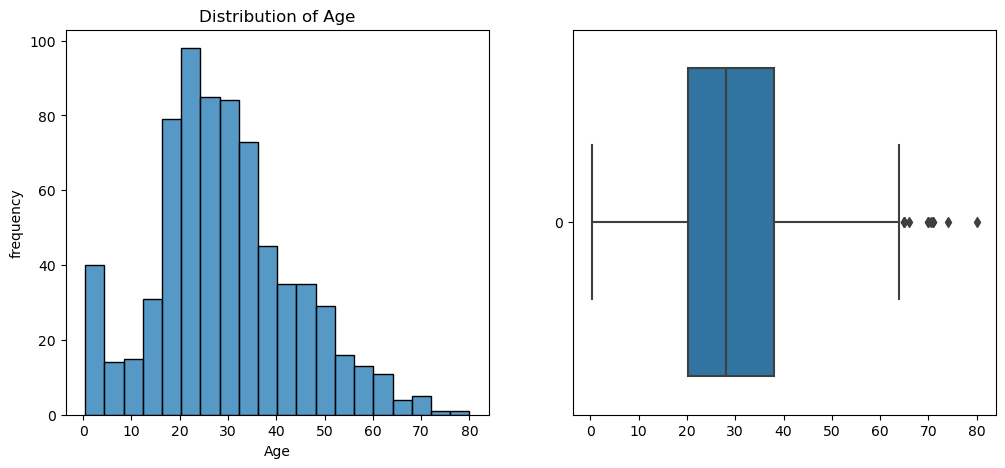

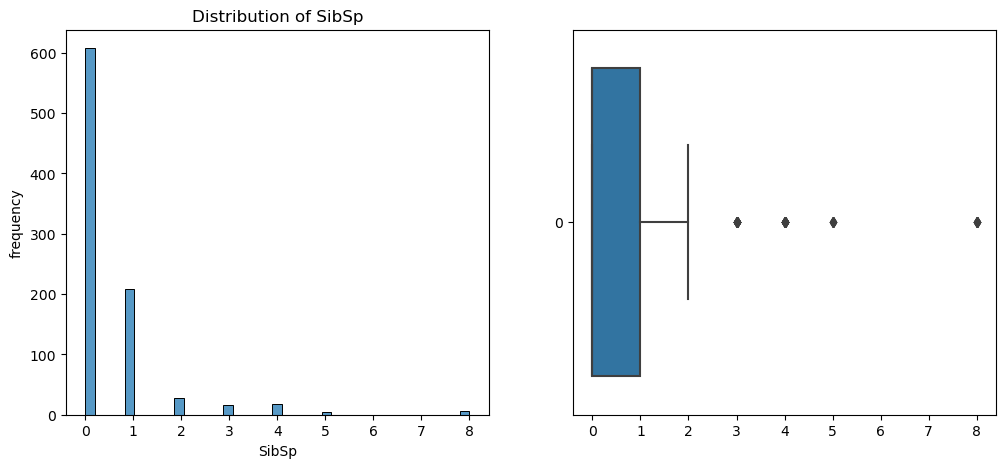

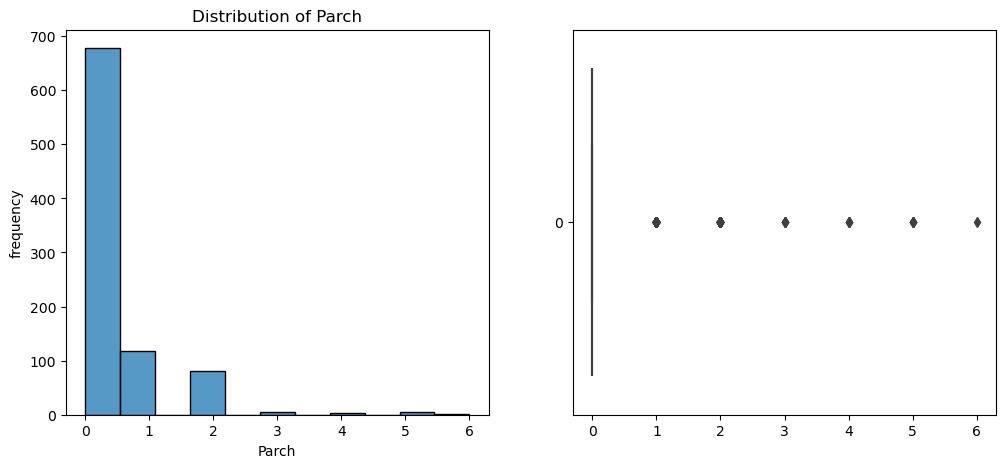

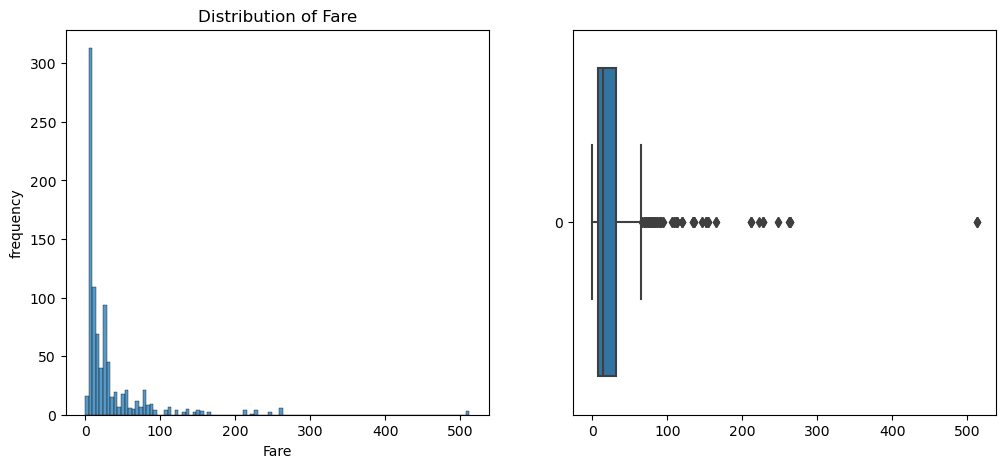

In [50]:
for col in num_col:
    plt.figure(figsize = (12, 5))
    plt.subplot(1,2,1)
    sns.histplot(df[col])
    plt.xlabel(df[col].name)
    plt.ylabel('frequency')
    plt.title(f'Distribution of {df[col].name}')
    plt.subplot(1,2,2)
    sns.boxplot(df[col], orient = 'h')

### Observation
- People that did not survive are more than people that survived
- majority of the passengers are in third class
- the males are almost twice the size of the females
- People embarked mostly from Southampton

In [52]:
for col in num_col:
    print(df[col].name)
    print(df[col].skew())
    print('------------------')

PassengerId
0.0
------------------
Survived
0.4785234382949897
------------------
Pclass
-0.6305479068752845
------------------
Age
0.38910778230082704
------------------
SibSp
3.6953517271630565
------------------
Parch
2.7491170471010933
------------------
Fare
4.787316519674893
------------------


### Observation
- fare is extremely skewed so lets

In [54]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [55]:
df['Sex'].nunique()

2

##  What is the ratio of survival

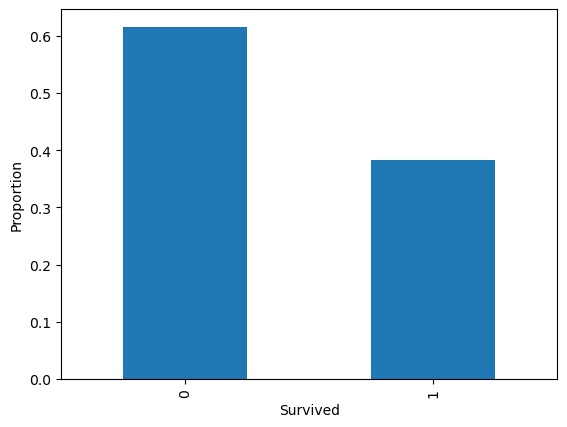

In [57]:
df['Survived'].value_counts(normalize = True).plot(kind = 'bar')
plt.ylabel('Proportion');

### Observation
- Majority of passengers did not survive

## which gender is more?

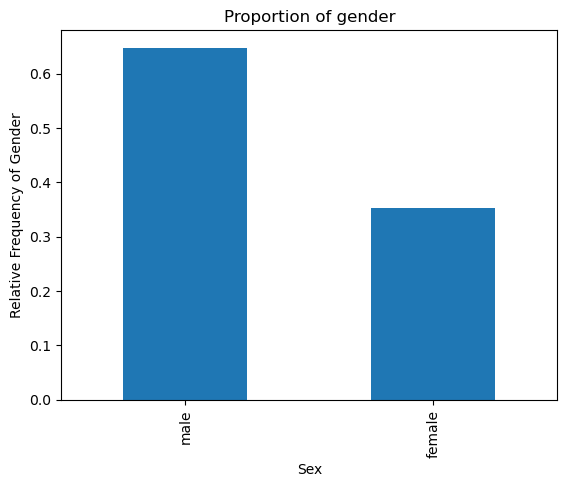

In [60]:
df['Sex'].value_counts(normalize =  True).plot(kind = 'bar')
plt.ylabel('Relative Frequency of Gender')
plt.title('Proportion of gender');

### Observation
- Male gender are more than female in the data set

## Bivariate Analysis

In [63]:
cat_col = df.select_dtypes('object').columns

- numerical x numerical ---> scatter plot--- correlation coefficient
- numerical x categorical ---> barchart, boxplot --- pivot_table, groupby
- categorical x categorical ---> barchart, KDE(density) plot--- crosstab, pivot_tables, groupby

### 1. numerical and numerical

correlation
-1 to 1
linear relationship is called pearson r correlation

In [67]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## is age related to fare?

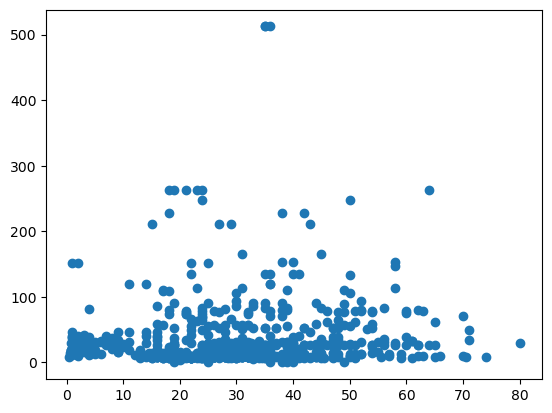

In [69]:
plt.scatter(df['Age'], df['Fare']);

### observation
- no correlation between age and fare

In [71]:
# sns.scatterplot(x = 'age', y = 'fare', data = df);

In [72]:
df['Fare'].corr(df['Age'])

0.09606669176903888

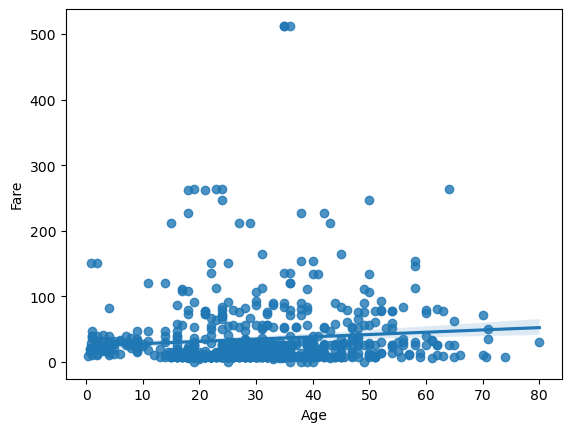

In [73]:
sns.regplot(x = 'Age', y = 'Fare', data = df);

### 2. categorical and numerical

## Is there a realtionship between socio-economic class and the fare they paid?

In [76]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

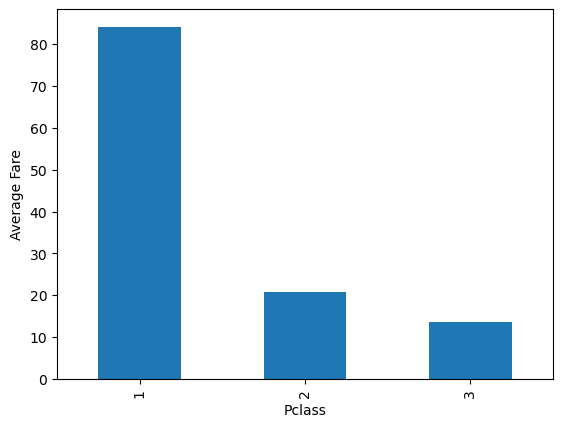

In [77]:
df.groupby('Pclass')['Fare'].mean().plot(kind = 'bar')
plt.ylabel('Average Fare');

In [78]:
# sns.barplot(x = 'Pclass', y = 'Fare', data = df);

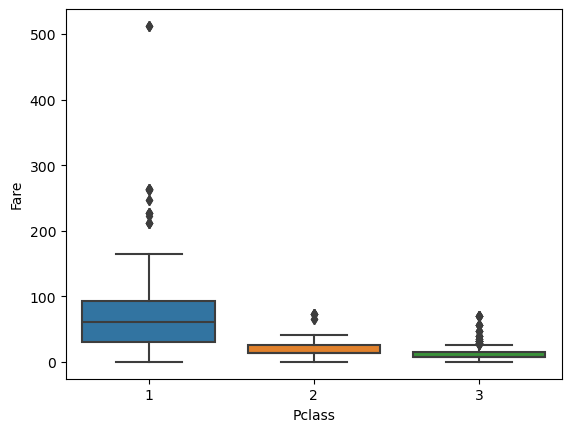

In [79]:
sns.boxplot(x = 'Pclass', y = 'Fare', data = df);

### Observation

- The amount they paid is related to the Pclass

In [81]:
# df.pivot_table(index = 'Pclass', values = 'Fare', aggfunc = 'median')

## is survival associated with Passenger class?

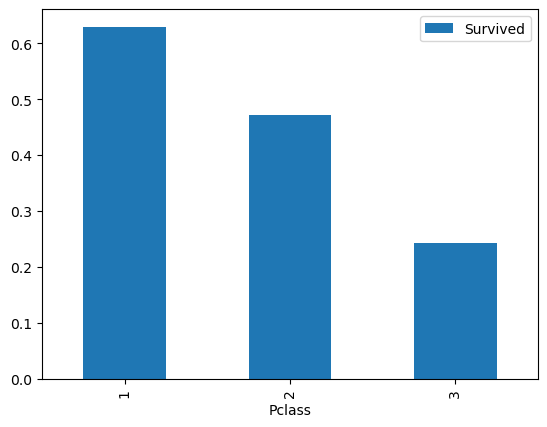

In [83]:
pd.pivot_table(data = df, index = 'Pclass', values = 'Survived', aggfunc = 'mean').plot(kind = 'bar');

### observations
- we can observe that class is related to survival 

### 3. categorical and categorical

## Which Age group survived most?

In [87]:
bins =  [ -np.inf, 18, 40, 60, np.inf ]
labels = [ 'infants/children', 'young adult', 'old adult', 'old aged']

age_grp = pd.cut(df['Age'], bins = bins, labels = labels)

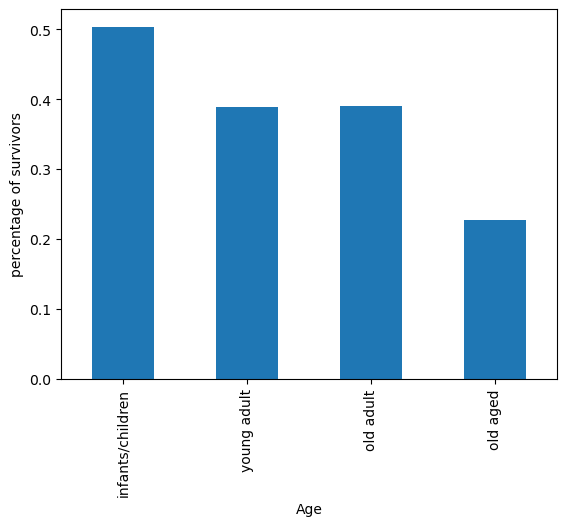

In [88]:
df.groupby(age_grp)['Survived'].mean().plot(kind = 'bar')
plt.ylabel("percentage of survivors");

### Observation
- children survived most, then young adult, and age people have the lowest number of survivors

## Which gender survivd the most?

In [91]:
pd.crosstab(index = df['Sex'], columns = df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


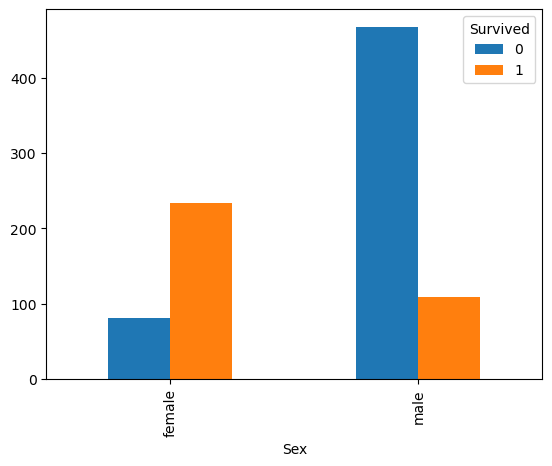

In [92]:
pd.crosstab(index = df['Sex'], columns = df['Survived']).plot(kind = 'bar');

### Observations

- the proportion of Women that survived are more than the men

## Does station affect the survival?

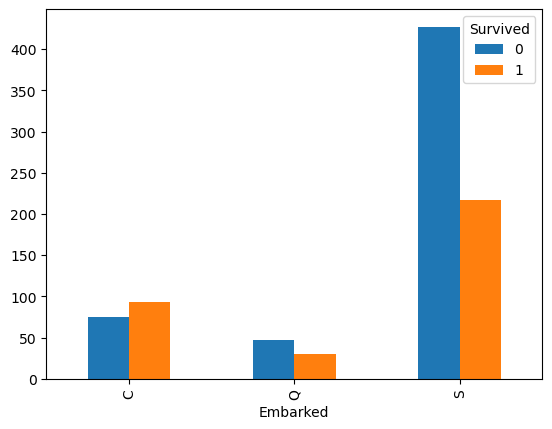

In [95]:
pd.crosstab(index = df['Embarked'], columns = df['Survived']).plot(kind = 'bar');

## Observations
- The people proportion of people that embarked and survived in Cherbourg are more than those who did not
- for Queenstown and Southampton the number of people that did not survive are more than those that survived 

## is station/location of embarkment related to the class of the passsenger?


In [98]:
pd.crosstab(df['Embarked'], columns = df['Pclass'])

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


### Observation
- Most people from Queenstown are in third class
- majority of people that boarded from Cherbourg are first class, this explains the previous observation 

In [100]:
df['Age'].corr(df['Fare'])

0.0960666917690389

In [101]:
num = df.select_dtypes('number')

In [102]:
num.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [103]:
corr = num.corr()

In [104]:
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


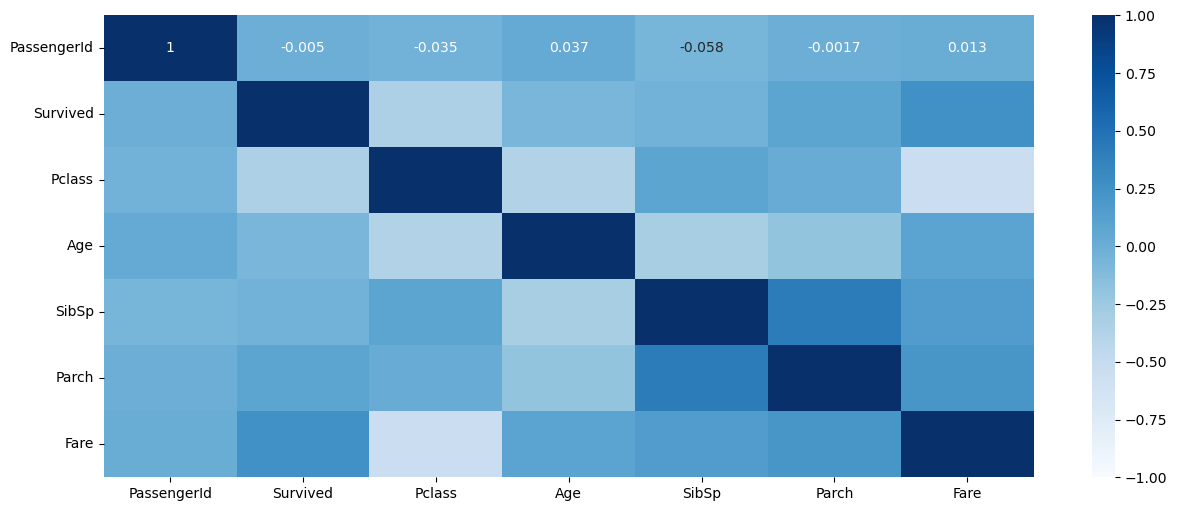

In [105]:
plt.figure(figsize = (15, 6))
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, cmap = 'Blues');

In [106]:
# sns.pairplot(df.select_dtypes('number'), hue = 'Survived');

In [107]:
np.log1p(df['Fare']).corr(df['Survived'])

0.32986212869680753

In [108]:
df['Fare'].corr(df['Survived'])

0.2573065223849625

# Outliers

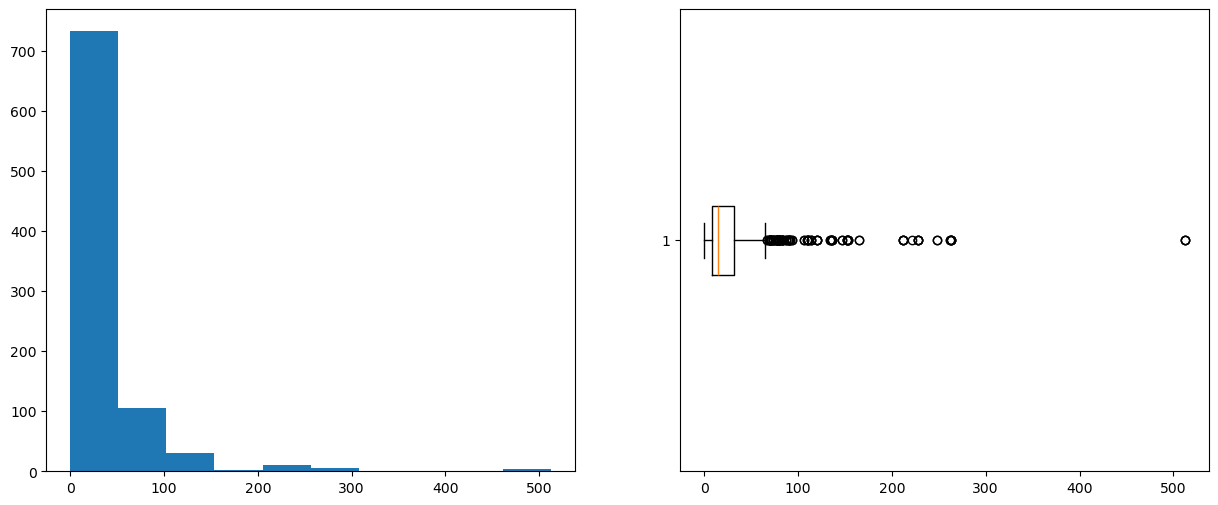

In [110]:
fig, ax = plt.subplots(1, 2, figsize =(15, 6))
ax[0].hist(df['Fare'])
ax[1].boxplot(df['Fare'], vert = False);

In [111]:
df['Fare'].shape

(891,)

## Ways in dealing with outliers

### 1. Setting Threshold

In [114]:
lower, upper = df['Fare'].quantile([0.1, 0.9])

In [115]:
mask = df['Fare'].between(lower, upper)

In [116]:
df['Fare'][mask]

1      71.2833
2       7.9250
3      53.1000
4       8.0500
5       8.4583
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 716, dtype: float64

### 2. 1.5IQR method

In [118]:
q1, q3 = df['Fare'].quantile([0.25, 0.75])

In [119]:
iqr = q3-q1

In [120]:
lower = q1 - (1.5 * q1)

In [121]:
upper = q3 + (1.5 * q1)

In [122]:
df[(df['Fare'] > lower) & (df['Fare'] < upper)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 3. Z-Score method

In [124]:
df['Fare'].mean()

32.204207968574636

In [125]:
mean = np.mean(df['Fare'])

In [126]:
std = np.std(df['Fare'])

In [127]:
distance = std * 3

In [128]:
lower_threshold = mean - distance

In [129]:
upper_threshold = mean + distance

In [130]:
df[(df['Fare'] > lower_threshold) & (df['Fare'] < upper_threshold)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 4. Transformation
- Logarithm transformation
- Inverse transformation
- Square transformation
- Exponential transformation

## Feature Selection I - selecting feature information
- Domain knowledge
- % missing values 
- Multicolinearity
- Leaky Features
- Cardinality (high or low) 
- Amount of variance

# Machine Learning and Model Building

ScikitLearn OR sklearn for short

In [135]:
import sklearn

### Requirements before building a Model

- separate features from label
- X has to be a matrix and y a vector
- it has to be a numpy object
- data must be scaled
- no missing values
- numerical format/ Encoding


* Ensemble models eg RandomForest, XGBoost etc, they do not neccesarily require preprocessing steps (scaling and handling missing values)

In [137]:
y = df['Survived']
X = df.drop(columns = 'Survived')

### How to choose Model
- How easy it is to interprete
- Flexibility
- Time and resourses
- Performance

### WorkFlow of Machine learning Models in Sklearn

- Instantiate
- Fit/train
- predict
- evaluate

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .2)

### Preprocessing

- Missing values
- Scaling
- Encoding

In [144]:
from sklearn.model_selection import train_test_split


from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from category_encoders import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

In [145]:
# imputer = SimpleImputer()

In [146]:
 # X_imputed = imputer.fit_transform(X_train)

In [147]:
# scaler = StandardScaler()

In [148]:
# X_scaled = scaler.fit_transform(X_imputed)

In [149]:
# X_test_imputed = imputer.transform(X_test)

In [150]:
# scaler.transform(X_test_imputed)

In [151]:
# pd.concat([df1, df2], axis = 0)

## Baseline Model

In [153]:
df['Survived'].value_counts(normalize = True).max()

0.6161616161616161

### Observation
If we predict the mode(not survived) for every observation we will be 61% accurate 

# OR

In [156]:
y_train_mode = df['Survived'].mode()[0]

In [157]:
y_train_pred = [y_train_mode] * len(df)

In [158]:
from sklearn.metrics import accuracy_score

In [159]:
accuracy_score(df['Survived'], y_train_pred)

0.6161616161616161

## Pipeline

In [161]:
simple_pipeline = make_pipeline(SimpleImputer(),
                        OneHotEncoder(use_cat_names = True),
                        StandardScaler())

In [162]:
# pipeline.fit_transform(X_train)

### creating custom function transformer

In [164]:
def log_transformer(x):
    return np.log1p(x)

In [165]:
logarithm = FunctionTransformer(log_transformer)

In [166]:
num_col = ['Age', 'SibSp', 'Parch']
fare_col = ['Fare']
cat_col = ['Pclass', 'Sex', 'Embarked']

In [167]:
num_pipeline = make_pipeline(
    SimpleImputer(),
    StandardScaler()    
)

In [168]:
fare_pipeline = make_pipeline(
    SimpleImputer(),
    logarithm,
    StandardScaler()    
)

In [169]:
cat_pipeline = make_pipeline(
    SimpleImputer(strategy = 'constant', fill_value = 'other'),
    OneHotEncoder(handle_unknown = 'ignore')
)

In [170]:
preprocessor = ColumnTransformer(
    transformers = [
        ('cat_processing', cat_pipeline, cat_col),
        ('num_processing', num_pipeline, num_col),
        ('fare_trans', fare_pipeline, fare_col)
        
    ], remainder = 'drop'
)

In [171]:
preprocessor

ColumnTransformer(transformers=[('cat_processing',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='other',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Pclass', 'Sex', 'Embarked']),
                                ('num_processing',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'SibSp', 'Parch']),
                                ('fare_trans',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<function log_transformer at 0x12e878c20>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Fare'])])

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

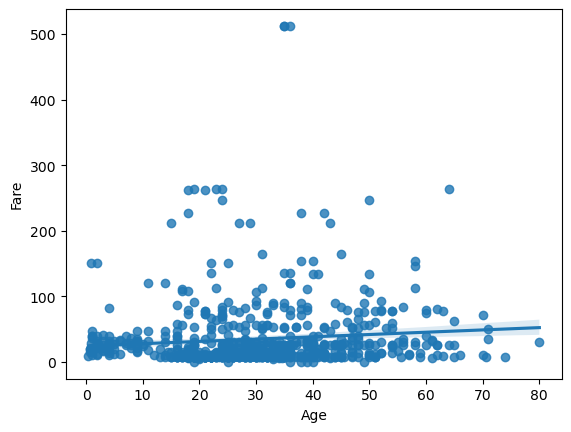

In [173]:
sns.regplot(x = 'Age', y = 'Fare', data = df);

In [174]:
log_reg = make_pipeline(
    preprocessor,
    LogisticRegression()
    
)

In [175]:
log_reg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat_processing',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='other',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('num_processing',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch']),
                                                 ('fare_trans',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function log_transformer at 0x12e878c20>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Fare'])])),
                ('logisticregression', LogisticRegression())])

In [176]:
y_pred = log_reg.predict(X_train)

In [177]:
y_pred[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [178]:
accuracy_score(y_train, y_pred)

0.8075842696629213

In [179]:
log_reg.score(X_test, y_test)

0.7988826815642458

# Note -
Normally, the test set is reserved for the final evaluation, but for the sake of learning we can evaluate using test set

## observation
We can confirm that our model is better than the baseline model, but can it be better than this?
we would see by this by comparing multiple models and doing some hyperparamter tunning, see next file...